In [1]:
## Let us label the additional MINFLUX data so we can use it later to test our software

# If running in a notebook make matplotlib interactive
%matplotlib ipympl

# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import shutil
import glob
import os

from blobBgone.utils import pyDialogue as pD
from mpl_image_labeller import image_labeller

In [3]:
## Grab blob and track files
# This method returns a list of all the files in the current directory that end with .npy

# If you are on Windows, you can leave the path argument as None to automatically call the explorer

def grab_thumbnails(path:str = None, key:str = '3D_P'):
    if path == None:
        try:
            path = pD.askDIR()
        except:
            path = input("Please enter the path to the point clouds: ")
            
    assert os.path.exists(path), "Path does not exist"
    assert os.path.isdir(path), "Path must be a directory"
    
    return glob.glob(os.path.join(path, f"{key}*.png"))

tracks = grab_thumbnails(path = None, key = 'iSCAT_P')

print(f"Found {len(tracks)} track thumbnails in the '{tracks[0].split(os.sep)[-2]}' directory.")

Found 128 track thumbnails in the 'C:/Users/belav/Documents/GitHub/blob-B-gone/Example_Data/Additional_MFX_Data/iSCAT_DATA/Thumbnails' directory.


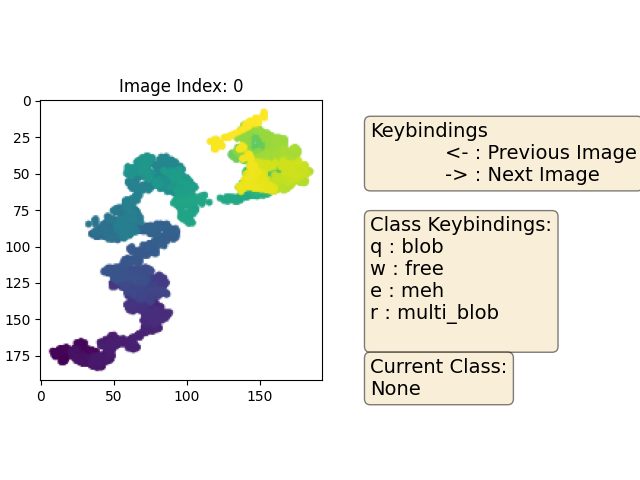

In [4]:
images = [plt.imread(track) for track in tracks]
labeller = image_labeller(
    images, classes=["blob", "free", "meh", 'multi_blob'], label_keymap=["q", "w", "e", "r"]
)
plt.show()

In [32]:
out = {key: np.array(tracks)[np.where(np.array(labeller.labels) == key)[0]] for key in np.unique(labeller.labels)}

## Even out file count so we don't overwrite the original data
def even_count(destination:str, file_type:str = '.npy', key:str = 'blob'):
    files = glob.glob(f"{destination}/MFX_P*{file_type}")
    count = glob.glob(f"{destination}/{key}*{file_type}").__len__()
    for index, file in enumerate(files):
        os.rename(file, os.path.join(destination, f"{key}_{count+1+index:04d}{file_type}"))

destination = 'Example_Data/Additional_MFX_Data/'

for key in out.keys():
    dest_th = os.path.join(destination, 'Labelled_Thumbnails', key)
    dest_dt = os.path.join(destination, 'Labelled_Data', key)
    
    if not os.path.exists(dest_th):
        os.makedirs(dest_th)
    if not os.path.exists(dest_dt):
        os.makedirs(dest_dt)
        
    for file in out[key]:
        if os.path.isfile(file):
            shutil.copy(file, dest_th)
            shutil.copy(file.replace('.png', '.npy').replace('Thumbnails', 'Data'), dest_dt)
            
    even_count(destination = dest_th,
               file_type = '.png',
               key = key)
    even_count(destination = dest_dt,
               file_type = '.npy',
               key = key)

In [14]:
## To keep the naming convention chosen

destination = 'Example_Data/Additional_MFX_Data/Labelled_Thumbnails/'

ls_dir = os.listdir(destination)
for dir in ls_dir:
    for i,files in enumerate(glob.glob(f"{destination}{dir}/*.png")):
        os.rename(files, f"{destination}{dir}/{dir}-{i+1:04d}.png")